In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk 
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [101]:
data = pd.read_csv("netflix_reviews.csv")

In [102]:
print(data.columns)

print(data.shape)

Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')
(113068, 8)


In [103]:
data.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,efd00499-5e00-49b5-9f32-bc7177ac5ca6,Mikel Magnusson,Netfix Canada forced my wife into a screen tha...,1,0,8.93.1 build 4 50540,2024-06-14 21:47:49,8.93.1 build 4 50540
1,be0d97e1-7de1-4f07-b493-35a53098b5a4,John McDevitt,I use this app until it asks if I'm still ther...,2,0,8.119.0 build 11 50706,2024-06-14 21:33:01,8.119.0 build 11 50706
2,8970dbcd-d75f-4016-bb93-efa5de3ef9e6,Mayur Savaliya,Boycott Netflix from Bharat,1,1,8.14.0 build 5 40129,2024-06-14 21:31:07,8.14.0 build 5 40129
3,a288bc3c-8a90-42d3-b585-1c8078faa96c,Magdalena Glessing,Little good movies and a lot of wonderful TV s...,5,0,8.118.1 build 10 50703,2024-06-14 21:27:26,8.118.1 build 10 50703
4,c388a806-0795-4812-b04e-5b2cdf327157,Elizabeth Turner,"New to this but, so far smooth sailing.app is ...",5,0,8.118.1 build 10 50703,2024-06-14 21:22:13,8.118.1 build 10 50703


In [104]:
data.isnull().sum()
#Need to handle null values - shows that where reviewCreatedVersion is Null, app version is Null

reviewId                    0
userName                    1
content                     2
score                       0
thumbsUpCount               0
reviewCreatedVersion    16491
at                          0
appVersion              16491
dtype: int64

In [105]:
data[data["content"].isna() == True ]

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
3384,a73c931f-5cce-4863-b1ae-40101455f137,Maria Wiley,NaN,5,0,8.114.0 build 19 50680,2024-05-21 16:56:29,8.114.0 build 19 50680
3735,839d55ed-ba9e-4753-a178-5799b9f86ffc,Myris Guilanda,NaN,2,0,NaN,2024-05-19 13:52:42,NaN


In [106]:
data = data.dropna(subset=["content"])
#Check deletion
data[data["content"].isna() == True ]

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion


In [107]:
#now remove columns that dont affect the final result - hence all except content and score
cols = ['reviewId', 'userName', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion']
data = data.drop(cols,axis=1)

In [108]:
data["length"] = data["content"].apply(len)
#random check
print(len(data["content"][10]))
print(data["length"][10])

4
4


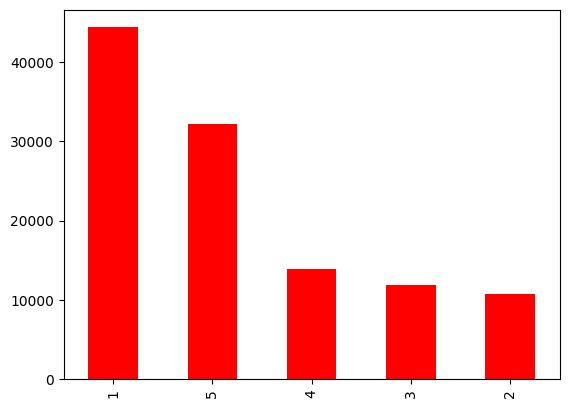

In [109]:
#analyse the score column
data["score"].value_counts().plot.bar(color="red")
plt.show()

In [110]:
data["score"].value_counts()

1    44343
5    32176
4    13853
3    11933
2    10761
Name: score, dtype: int64

In [111]:
data["sentiment"] = [0 if x == 1 or x == 2 else 1 for x in data["score"]]
data["sentiment"].value_counts()

1    57962
0    55104
Name: sentiment, dtype: int64

In [112]:
import re
corpus=[]
stemmer = PorterStemmer()
#print(data.shape[0])
for i in range(0,data.shape[0]):
    review = re.sub('[^a-zA-Z]'," ",data.iloc[i]["content"])
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if word not in stop_words]
    review = " ".join(review)
    corpus.append(review)

In [113]:
data["length"].describe()

count    113066.000000
mean        157.694957
std         111.893310
min           1.000000
25%          84.000000
50%         124.000000
75%         195.000000
max        1752.000000
Name: length, dtype: float64

In [114]:
X = corpus
y = data["sentiment"].tolist()

In [115]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=11)

In [116]:
from numpy import array

from keras.preprocessing.text import one_hot,Tokenizer
from keras.preprocessing.sequence import pad_sequences




In [117]:
num_words = 50000

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(X_train)



In [118]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [119]:
X_train_seq = np.array(X_train_seq,dtype="object")
X_test_seq = np.array(X_test_seq,dtype="object")


In [120]:
X_train_seq = pad_sequences(X_train_seq,padding="post",maxlen=100)
X_test_seq = pad_sequences(X_test_seq,padding="post",maxlen=100)

In [121]:
train_labels = np.asarray(y_train)
test_labels = np.asarray(y_test)

In [122]:
import tensorflow as tf
from keras import regularizers,layers,losses
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout,Flatten,Conv1D,LSTM,GlobalMaxPool1D,Embedding


train_ds = tf.data.Dataset.from_tensor_slices((X_train_seq,train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((X_test_seq,test_labels))

In [123]:
X_train_seq[8]

array([3997, 1409,  746,  232,   66,  833,  630,    5,   21,  172,   18,
         21,   27, 1237, 5556,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])

In [128]:
max_features = 25000
embedding_dim = 16
seq_lenth = 100

model = tf.keras.Sequential()
model.add(Embedding(max_features+1,embedding_dim,input_length=seq_lenth))
model.add(Dropout(0.4))
model.add(LSTM(embedding_dim,dropout=0.2,recurrent_dropout=0.2,return_sequences=True))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(8,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           400016    
                                                                 
 dropout_6 (Dropout)         (None, 100, 16)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 16)           2112      
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               819712    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 8)                

In [129]:
model.compile(loss=losses.BinaryCrossentropy(),optimizer="Adam",metrics=["accuracy"])

In [130]:
train_ds

<_TensorSliceDataset element_spec=(TensorSpec(shape=(100,), dtype=tf.int32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [131]:
history = model.fit(train_ds.shuffle(5000).batch(1024),validation_data=test_ds.batch(1024),epochs=10,verbose=1)

Epoch 1/10
78/78 [==============================] - 32s 334ms/step - loss: 0.5325 - accuracy: 0.7326 - val_loss: 0.3881 - val_accuracy: 0.8345
Epoch 2/10
78/78 [==============================] - 27s 349ms/step - loss: 0.4142 - accuracy: 0.8253 - val_loss: 0.3654 - val_accuracy: 0.8414
Epoch 3/10
78/78 [==============================] - 28s 363ms/step - loss: 0.3904 - accuracy: 0.8365 - val_loss: 0.3642 - val_accuracy: 0.8390
Epoch 4/10
78/78 [==============================] - 29s 366ms/step - loss: 0.3795 - accuracy: 0.8405 - val_loss: 0.3629 - val_accuracy: 0.8417
Epoch 5/10
78/78 [==============================] - 29s 365ms/step - loss: 0.3686 - accuracy: 0.8464 - val_loss: 0.3609 - val_accuracy: 0.8416
Epoch 6/10
78/78 [==============================] - 28s 364ms/step - loss: 0.3599 - accuracy: 0.8481 - val_loss: 0.3631 - val_accuracy: 0.8417
Epoch 7/10
78/78 [==============================] - 29s 375ms/step - loss: 0.3523 - accuracy: 0.8522 - val_loss: 0.3664 - val_accuracy: 0.8411

In [132]:
text = """I have faced a lot of issues with this app, it does not load the necessary videos when needed and very less selection choices as compared to other apps. This app is very bad and Hate it
"""

input=[]
stemmer = PorterStemmer()
#print(data.shape[0])
review = re.sub('[^a-zA-Z]'," ",text)
review = review.lower().split()
review = [stemmer.stem(word) for word in review if word not in stop_words]
review = " ".join(review)
input.append(review)

print(input)

['face lot issu app load necessari video need less select choic compar app app bad hate']


In [133]:
input = tokenizer.texts_to_sequences(input)

In [134]:
input = np.array(input,dtype="int")

In [135]:
input = pad_sequences(input,padding="post",maxlen=100)

In [136]:
x = model.predict(input)

1/1 [==============================] - 1s 582ms/step


In [137]:
x[0]

array([0.31179324], dtype=float32)

In [138]:
if x[0] > 0.7 :
    print("Good review")
else:
    print("Bad review")

Bad review
